In [243]:
import pandas as pd
import numpy as np
import time
from pandas import Series
from matplotlib.pyplot import figure
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime, timedelta
import re
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels import tsa
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import calendar
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import patsy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
pd.options.display.max_columns = 100
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler

In [351]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2014-12-31') & (df['date'] < '2018-01-25')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
dfw = dfw[1:]
dfw=dfw[:-2]
series = dfw['Crime Subcategory']
series

date
2015-01-11     873
2015-01-18     897
2015-01-25     904
2015-02-01     927
2015-02-08     807
2015-02-15     912
2015-02-22     829
2015-03-01     880
2015-03-08     837
2015-03-15     861
2015-03-22     890
2015-03-29     877
2015-04-05     903
2015-04-12     874
2015-04-19     874
2015-04-26     874
2015-05-03     887
2015-05-10     877
2015-05-17     967
2015-05-24     912
2015-05-31     911
2015-06-07     841
2015-06-14     973
2015-06-21     984
2015-06-28     932
2015-07-05     908
2015-07-12     905
2015-07-19     892
2015-07-26     925
2015-08-02     896
              ... 
2017-06-25     963
2017-07-02    1127
2017-07-09     985
2017-07-16     968
2017-07-23     999
2017-07-30    1038
2017-08-06    1082
2017-08-13     984
2017-08-20    1017
2017-08-27    1021
2017-09-03    1082
2017-09-10     907
2017-09-17    1001
2017-09-24     997
2017-10-01     944
2017-10-08     973
2017-10-15    1008
2017-10-22    1012
2017-10-29    1009
2017-11-05     885
2017-11-12     875
2017-11

Train Score: 53.64 RMSE
Test Score: 67.06 RMSE


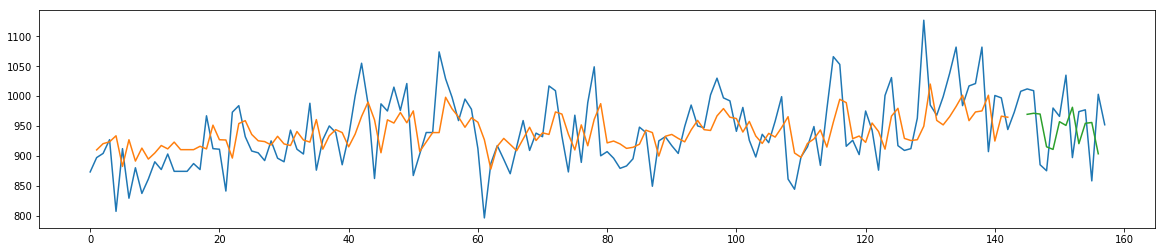

In [363]:
# LSTM with regression framing
# import numpy
# import matplotlib.pyplot as plt
# from pandas import read_csv
# import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# # convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return numpy.array(dataX), numpy.array(dataY)
# # fix random seed for reproducibility
# numpy.random.seed(7)
# # load the dataset

# dataset = dfw.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# # split into train and test sets
# train, test = dataset[0:-14], dataset[-14:]
# # reshape into X=t and Y=t+1
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# # shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
 - 5s - loss: 0.2586
Epoch 2/100
 - 1s - loss: 0.0996
Epoch 3/100
 - 1s - loss: 0.0475
Epoch 4/100
 - 1s - loss: 0.0360
Epoch 5/100
 - 1s - loss: 0.0348
Epoch 6/100
 - 1s - loss: 0.0342
Epoch 7/100
 - 1s - loss: 0.0339
Epoch 8/100
 - 1s - loss: 0.0334
Epoch 9/100
 - 1s - loss: 0.0331
Epoch 10/100
 - 1s - loss: 0.0326
Epoch 11/100
 - 1s - loss: 0.0323
Epoch 12/100
 - 1s - loss: 0.0320
Epoch 13/100
 - 1s - loss: 0.0319
Epoch 14/100
 - 1s - loss: 0.0316
Epoch 15/100
 - 1s - loss: 0.0311
Epoch 16/100
 - 1s - loss: 0.0310
Epoch 17/100
 - 1s - loss: 0.0307
Epoch 18/100
 - 1s - loss: 0.0304
Epoch 19/100
 - 1s - loss: 0.0303
Epoch 20/100
 - 1s - loss: 0.0300
Epoch 21/100
 - 1s - loss: 0.0300
Epoch 22/100
 - 1s - loss: 0.0298
Epoch 23/100
 - 1s - loss: 0.0299
Epoch 24/100
 - 1s - loss: 0.0293
Epoch 25/100
 - 1s - loss: 0.0290
Epoch 26/100
 - 1s - loss: 0.0291
Epoch 27/100
 - 1s - loss: 0.0290
Epoch 28/100
 - 1s - loss: 0.0288
Epoch 29/100
 - 1s - loss: 0.0287
Epoch 30/100
 - 1s - lo

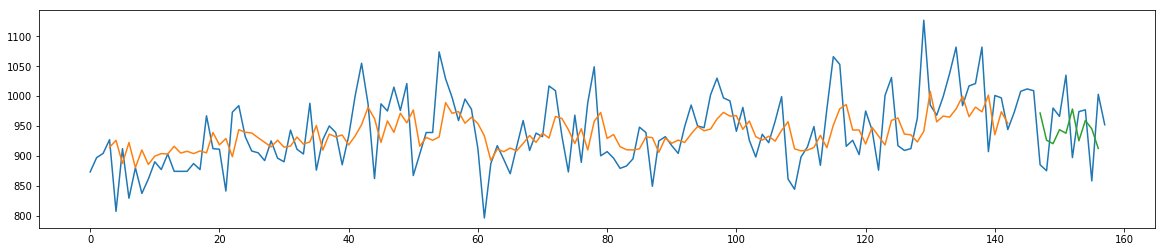

In [364]:
#Regression framing
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-14], dataset[-14:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Train Score: 53.73 RMSE
Test Score: 70.52 RMSE


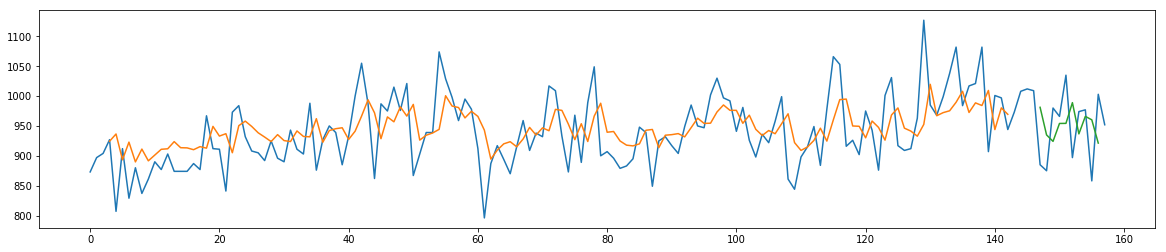

In [372]:
# LSTM with time step regression framing

# convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return numpy.array(dataX), numpy.array(dataY)
# # fix random seed for reproducibility
# numpy.random.seed(7)
# # load the dataset
# dataset = dfw.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# # split into train and test sets
# train, test = dataset[0:-14], dataset[-14:]
# # reshape into X=t and Y=t+1
# look_back = 3
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(look_back, 1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
140/140 [==============================] - 7s 50ms/step - loss: 0.0344
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0289
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0284
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0280
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0278
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0276
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0274
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0273
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0272
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0271
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0270
Epoch 1/1
140/140 [==============================] - 1s 5ms/step - loss: 0.0269
Epoch 1/1
140/140 [====================

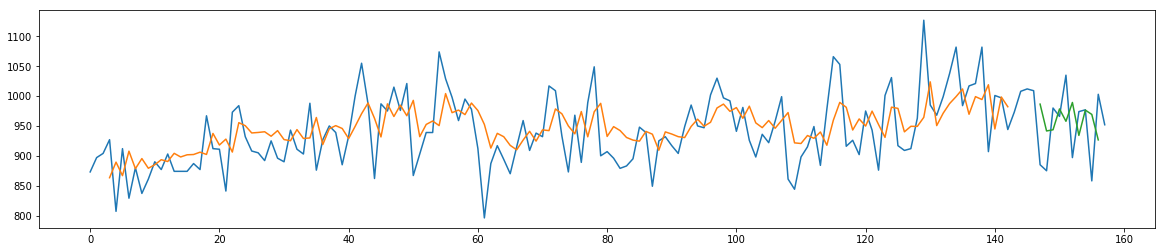

In [384]:
# LSTM with memory - 3 Day lookback

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-14], dataset[-14:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(4, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [415]:
# LSTM with memory - 3 Day lookback -- all data and 70/30 split
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-08-31')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
#dfw = dfw[1:]
dfw=dfw[:-1]
series = dfw['Crime Subcategory']
series

date
2008-01-06     709
2008-01-13     787
2008-01-20     743
2008-01-27     718
2008-02-03     657
2008-02-10     689
2008-02-17     755
2008-02-24     783
2008-03-02     786
2008-03-09     742
2008-03-16     735
2008-03-23     738
2008-03-30     813
2008-04-06     753
2008-04-13     730
2008-04-20     769
2008-04-27     836
2008-05-04     756
2008-05-11     838
2008-05-18     789
2008-05-25     846
2008-06-01     838
2008-06-08     805
2008-06-15     903
2008-06-22     843
2008-06-29     824
2008-07-06     810
2008-07-13     762
2008-07-20     893
2008-07-27     910
              ... 
2018-02-04    1000
2018-02-11     945
2018-02-18    1020
2018-02-25     918
2018-03-04     943
2018-03-11     869
2018-03-18     948
2018-03-25     940
2018-04-01    1005
2018-04-08     961
2018-04-15     941
2018-04-22     895
2018-04-29    1012
2018-05-06    1018
2018-05-13     991
2018-05-20     998
2018-05-27    1073
2018-06-03     926
2018-06-10    1009
2018-06-17    1024
2018-06-24    1017
2018-07

Epoch 1/1
402/402 [==============================] - 10s 25ms/step - loss: 0.0172
Epoch 1/1
402/402 [==============================] - 2s 6ms/step - loss: 0.0120
Epoch 1/1
402/402 [==============================] - 2s 6ms/step - loss: 0.0115
Epoch 1/1
402/402 [==============================] - 3s 6ms/step - loss: 0.0111
Epoch 1/1
402/402 [==============================] - 3s 6ms/step - loss: 0.0109
Epoch 1/1
402/402 [==============================] - 2s 6ms/step - loss: 0.0108
Epoch 1/1
402/402 [==============================] - 3s 7ms/step - loss: 0.0107
Epoch 1/1
402/402 [==============================] - 4s 9ms/step - loss: 0.0106
Epoch 1/1
402/402 [==============================] - 3s 7ms/step - loss: 0.0105
Epoch 1/1
402/402 [==============================] - 3s 7ms/step - loss: 0.0104
Epoch 1/1
402/402 [==============================] - 3s 7ms/step - loss: 0.0103
Epoch 1/1
402/402 [==============================] - 2s 6ms/step - loss: 0.0102
Epoch 1/1
402/402 [===================

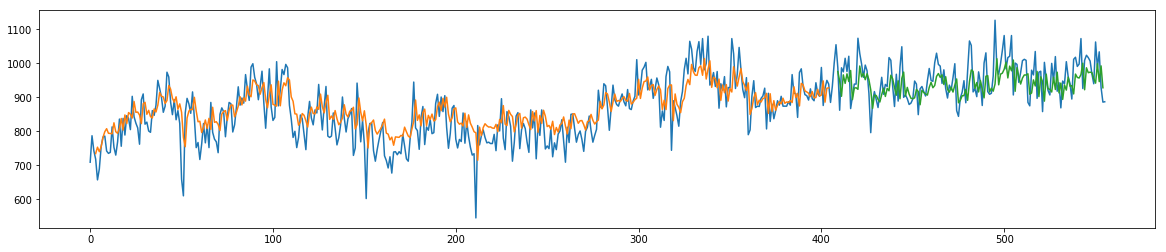

In [416]:
# LSTM with memory - 3 Day lookback -- all data and 70/30 split
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-150], dataset[-150:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(4, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
142/142 [==============================] - 8s 54ms/step - loss: 0.0386
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0275
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0273
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0271
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0269
Epoch 1/1
142/142 [==============================] - 1s 6ms/step - loss: 0.0268
Epoch 1/1
142/142 [==============================] - 1s 6ms/step - loss: 0.0267
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0266
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0265
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0264
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0264
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0263
Epoch 1/1
142/142 [====================

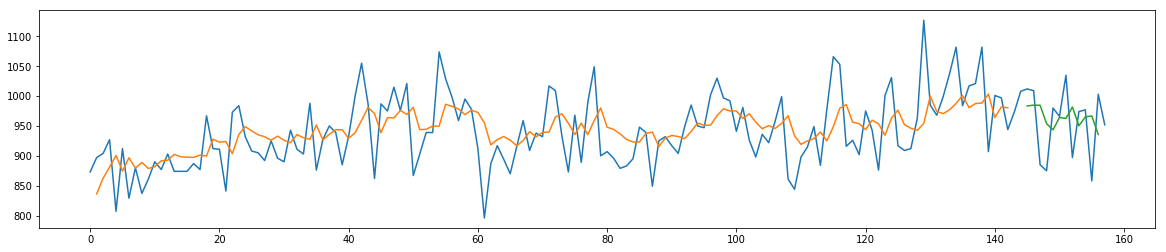

In [406]:
# LSTM with memory - 1 Day lookback

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-14], dataset[-14:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(4, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
142/142 [==============================] - 8s 54ms/step - loss: 0.0329
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0272
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0272
Epoch 1/1
142/142 [==============================] - 1s 5ms/step - loss: 0.0272
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0272
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0272
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 1/1
142/142 [==============================] - 1s 4ms/step - loss: 0.0271
Epoch 1/1
142/142 [====================

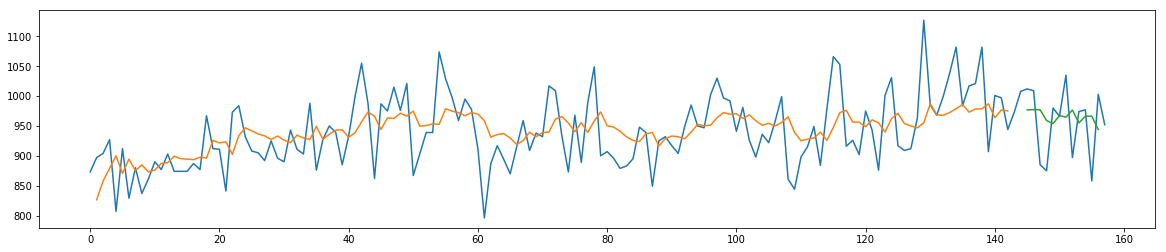

In [407]:
# LSTM with memory - 1 Day lookback and 1 neuron

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-14], dataset[-14:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(1, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

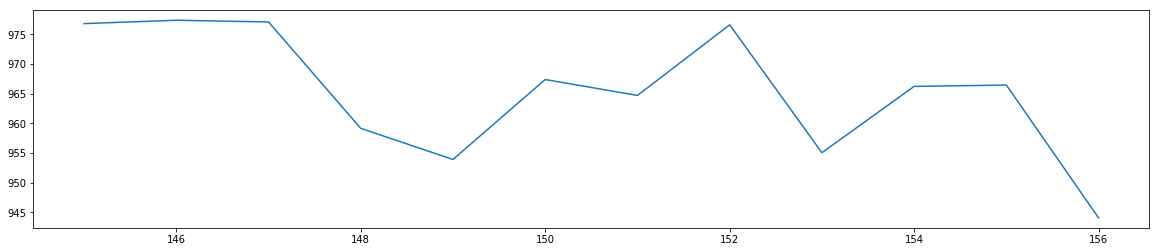

In [408]:
plt.figure(figsize=[20,4])
plt.plot(testPredictPlot)


In [410]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [413]:
create_dataset(dfw.values,1)

(array([[ 873],
        [ 897],
        [ 904],
        [ 927],
        [ 807],
        [ 912],
        [ 829],
        [ 880],
        [ 837],
        [ 861],
        [ 890],
        [ 877],
        [ 903],
        [ 874],
        [ 874],
        [ 874],
        [ 887],
        [ 877],
        [ 967],
        [ 912],
        [ 911],
        [ 841],
        [ 973],
        [ 984],
        [ 932],
        [ 908],
        [ 905],
        [ 892],
        [ 925],
        [ 896],
        [ 890],
        [ 943],
        [ 911],
        [ 903],
        [ 988],
        [ 876],
        [ 927],
        [ 950],
        [ 939],
        [ 885],
        [ 933],
        [1000],
        [1055],
        [ 987],
        [ 862],
        [ 987],
        [ 975],
        [1015],
        [ 976],
        [1021],
        [ 867],
        [ 903],
        [ 939],
        [ 939],
        [1074],
        [1029],
        [ 998],
        [ 959],
        [ 995],
        [ 978],
        [ 912],
        [ 796],
        

Epoch 1/1
140/140 [==============================] - 8s 54ms/step - loss: 0.0593
Epoch 1/1
140/140 [==============================] - 1s 10ms/step - loss: 0.0314
Epoch 1/1
140/140 [==============================] - 1s 8ms/step - loss: 0.0310
Epoch 1/1
140/140 [==============================] - 1s 8ms/step - loss: 0.0307
Epoch 1/1
140/140 [==============================] - 1s 8ms/step - loss: 0.0304
Epoch 1/1
140/140 [==============================] - 1s 8ms/step - loss: 0.0302
Epoch 1/1
140/140 [==============================] - 1s 8ms/step - loss: 0.0301
Epoch 1/1
140/140 [==============================] - 1s 9ms/step - loss: 0.0299
Epoch 1/1
140/140 [==============================] - 1s 7ms/step - loss: 0.0298
Epoch 1/1
140/140 [==============================] - 1s 7ms/step - loss: 0.0297
Epoch 1/1
140/140 [==============================] - 1s 7ms/step - loss: 0.0297
Epoch 1/1
140/140 [==============================] - 1s 7ms/step - loss: 0.0296
Epoch 1/1
140/140 [===================

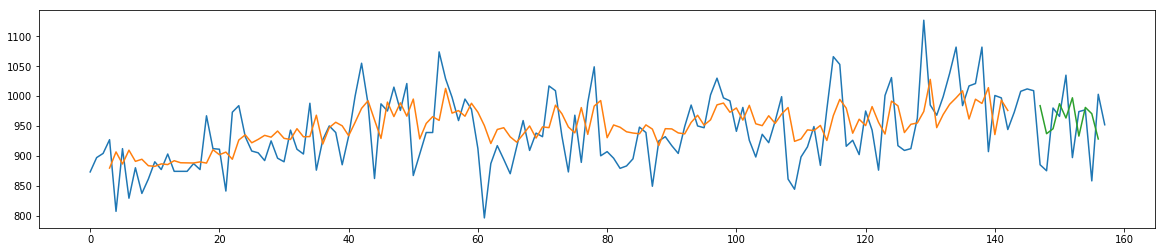

In [388]:
# Stacked LSTM  with memory
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-14], dataset[-14:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=1 )
testPredict = model.predict(testX, batch_size= 1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [391]:
dfw.head()

,Crime Subcategory
date,
2015-01-11,873
2015-01-18,897
2015-01-25,904
2015-02-01,927
2015-02-08,807


Epoch 1/1
82/82 [==============================] - 10s 119ms/step - loss: 0.1103
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0287
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0280
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0279
Epoch 1/1
82/82 [==============================] - 3s 41ms/step - loss: 0.0279
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0278
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0278
Epoch 1/1
82/82 [==============================] - 3s 40ms/step - loss: 0.0278
Epoch 1/1
82/82 [==============================] - 3s 38ms/step - loss: 0.0277
Epoch 1/1
82/82 [==============================] - 3s 40ms/step - loss: 0.0277
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0277
Epoch 1/1
82/82 [==============================] - 3s 39ms/step - loss: 0.0276
Epoch 1/1
82/82 [==============================] -

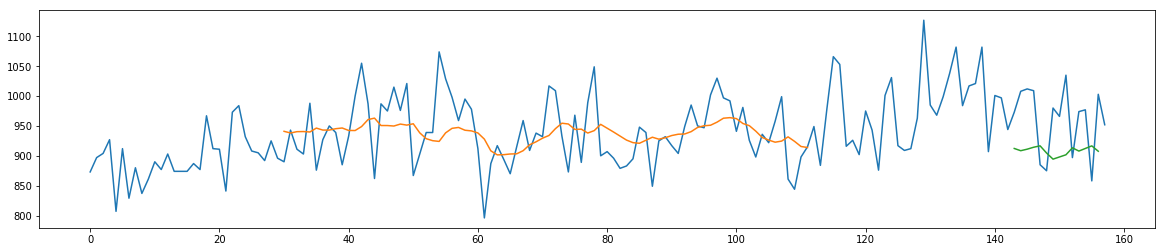

In [399]:
#Stacked LSTM  with memory
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = dataset[0:-45], dataset[-45:]
# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=1 )
testPredict = model.predict(testX, batch_size= 1)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=[20,4])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [405]:
testPredict

array([[912.2804 ],
       [908.5377 ],
       [911.09344],
       [914.33527],
       [916.69165],
       [904.6798 ],
       [894.4275 ],
       [898.02264],
       [901.7086 ],
       [913.33795],
       [907.9472 ],
       [912.2679 ],
       [916.63544],
       [907.6522 ]], dtype=float32)

In [349]:
agg['comb'] = agg[['var1(t-3)','var1(t-2)','var1(t-1)']].values.tolist()
agg


,var1(t-3),var1(t-2),var1(t-1),var1(t),comb
3,873.0,897.0,904.0,927,"[873.0, 897.0, 904.0]"
4,897.0,904.0,927.0,807,"[897.0, 904.0, 927.0]"
5,904.0,927.0,807.0,912,"[904.0, 927.0, 807.0]"
6,927.0,807.0,912.0,829,"[927.0, 807.0, 912.0]"
7,807.0,912.0,829.0,880,"[807.0, 912.0, 829.0]"
8,912.0,829.0,880.0,837,"[912.0, 829.0, 880.0]"
9,829.0,880.0,837.0,861,"[829.0, 880.0, 837.0]"
10,880.0,837.0,861.0,890,"[880.0, 837.0, 861.0]"
11,837.0,861.0,890.0,877,"[837.0, 861.0, 890.0]"
12,861.0,890.0,877.0,903,"[861.0, 890.0, 877.0]"


In [317]:
weather = pd.read_csv('1452977.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19,20,23,25,26,27,28,29,33,34,44,45,46,47,72,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [318]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104827 entries, 0 to 104826
Data columns (total 90 columns):
STATION                              104827 non-null object
STATION_NAME                         104827 non-null object
ELEVATION                            104827 non-null float64
LATITUDE                             104827 non-null float64
LONGITUDE                            104827 non-null float64
DATE                                 104827 non-null object
REPORTTPYE                           104827 non-null object
HOURLYSKYCONDITIONS                  91203 non-null object
HOURLYVISIBILITY                     101199 non-null object
HOURLYPRSENTWEATHERTYPE              20527 non-null object
HOURLYDRYBULBTEMPF                   101190 non-null object
HOURLYDRYBULBTEMPC                   101190 non-null object
HOURLYWETBULBTEMPF                   100931 non-null object
HOURLYWETBULBTEMPC                   100931 non-null object
HOURLYDewPointTempF                  101074 non-

In [319]:
weather['date'] = pd.to_datetime(weather['DATE'],infer_datetime_format=True)
mask1 = (weather['date'] > '2014-12-31') & (weather['date'] <'2018-01-25')

In [320]:
w = weather.loc[mask1] 
w = w[['date', 'HOURLYPrecip', 'HOURLYDRYBULBTEMPF']]

In [321]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32529 entries, 65991 to 98519
Data columns (total 3 columns):
date                  32529 non-null datetime64[ns]
HOURLYPrecip          27523 non-null object
HOURLYDRYBULBTEMPF    31354 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1016.5+ KB


In [322]:
w['dateonly'] = w['date'].dt.date

#Replacing values with "s" in them with NA
#Replacing "Trace" precipitation with 0
replacements = {
   'HOURLYDRYBULBTEMPF': {
      r'(.*s)': np.NaN,
      r'(\*)': np.NaN}
}
w.replace(replacements, regex=True, inplace=True)

replacements = {
   'HOURLYPrecip': {
      r'(.*s)': np.NaN,
    r'T': 0.00}
}
w.replace(replacements, regex=True, inplace=True)


In [323]:
w['temp'] = [float(x) for x in w['HOURLYDRYBULBTEMPF']]
w['prec'] = [float(x) for x in w['HOURLYPrecip']]
# wgroup = w.groupby('dateonly')['prec'].mean()
# wgroup = w.groupby('dateonly')['temp'].mean()
wgroup = w.groupby('dateonly')['prec','temp'].mean()


In [324]:
dfplus = dfw.join(wgroup)
dfplus

,Crime Subcategory,prec,temp
date,,,
2015-01-11,873,0.002222,49.216216
2015-01-18,897,0.009600,52.100000
2015-01-25,904,0.000417,55.793103
2015-02-01,927,0.001600,47.457143
2015-02-08,807,0.006250,54.750000
2015-02-15,912,0.000000,48.115385
2015-02-22,829,0.000000,44.760000
2015-03-01,880,0.000000,46.653846
2015-03-08,837,0.000000,50.960000


In [325]:
dfplus.interpolate(inplace=True)